### Daytum +2 Course: Data Analytics, Geostatistics and Machine Learning Deep Dive

### Spatial Continuity Calculation Demonstration and Exercise

#### Goal

Calculate spatial continuity for a spatial dataset.

#### Description

Here's a simple, documented workflow, demonstration of spatial continuity calculation for subsurface modeling workflows. This should help you get started with building subsurface models that integrate spatial continuity.  

#### Spatial Continuity 

**Spatial Continuity** is the correlation between values over distance.

* No spatial continuity – no correlation between values over distance, random values at each location in space regardless of separation distance.

* Homogenous phenomenon have perfect spatial continuity, since all values as the same (or very similar) they are correlated. 

We need a statistic to quantify spatial continuity! A convenient method is the Semivariogram.

#### The Semivariogram

Function of difference over distance.

* The expected (average) squared difference between values separated by a lag distance vector (distance and direction), $h$:

\begin{equation}
\gamma(\bf{h}) = \frac{1}{2 N(\bf{h})} \sum^{N(\bf{h})}_{\alpha=1} (z(\bf{u}_\alpha) - z(\bf{u}_\alpha + \bf{h}))^2  
\end{equation}

where $z(\bf{u}_\alpha)$ and $z(\bf{u}_\alpha + \bf{h})$ are the spatial sample values at tail and head locations of the lag vector respectively.

* Calculated over a suite of lag distances to obtain a continuous function.

* the $\frac{1}{2}$ term converts a variogram into a semivariogram, but in practice the term variogram is used instead of semivariogram.
* We prefer the semivariogram because it relates directly to the covariance function, $C_x(\bf{h})$ and univariate variance, $\sigma^2_x$:

\begin{equation}
C_x(\bf{h}) = \sigma^2_x - \gamma(\bf{h})
\end{equation}

Note the correlogram is related to the covariance function as:

\begin{equation}
\rho_x(\bf{h}) = \frac{C_x(\bf{h})}{\sigma^2_x}
\end{equation}

The correlogram provides of function of the $\bf{h}-\bf{h}$ scatter plot correlation vs. lag offset $\bf{h}$.  

\begin{equation}
-1.0 \le \rho_x(\bf{h}) \le 1.0
\end{equation}

#### Variogram Observations

The following are common observations for variograms that should assist with their practical use.

##### Observation \#1 - As distance increases, variability increase (in general).

This is common since in general, over greater distance offsets, there is often more difference between the head and tail samples.

In some cases, such as with spatial cyclicity of the hole effect variogram model the variogram may have negative slope over somelag distance intervals

Negative slopes at lag distances greater than half the data extent are often caused by too few pairs for a reliable variogram calculation

##### Observation \#2 - Calculated with over all possible pairs separated by lag vector, $\bf{𝐡}$.

We scan through the entire data set, searching for all possible pair combinations with all other data.  We then calculate the variogram as one half the expectation of squared difference between all pairs.

More pairs results in a more reliable measure.

##### Observation \#3 - Need to plot the sill to know the degree of correlation.

**Sill** is the variance, $\sigma^2_x$

Given stationarity of the variance, $\sigma^2_x$, and variogram $\gamma(\bf{h})$:

we can define the covariance function:

\begin{equation}
C_x(\bf{h}) = \sigma^2_x - \gamma(\bf{h})
\end{equation}

The covariance measure is a measure of similarity over distance (the mirror image of the variogram as shown by the equation above).

Given a standardized distribution $\sigma^2_x = 1.0$, the covariance, $C_x(\bf{h})$, is equal to the correlogram, $\rho_x(\bf{h})$: 

\begin{equation}
\rho_x(\bf{h}) = \sigma^2_x - \gamma(\bf{h})
\end{equation}

##### Observation \#4 - The lag distance at which the variogram reaches the sill is know as the range.

At the range, knowing the data value at the tail location provides no information about a value at the head location of the lag distance vector.

##### Observation \#5 - The nugget effect, a discontinuity at the origin

Sometimes there is a discontinuity in the variogram at distances less than the minimum data spacing.  This is known as **nugget effect**.

The ratio of nugget / sill, is known as relative nugget effect (%). Modeled as a discontinuity with no correlation structure that at lags, $h \gt \epsilon$, an infinitesimal lag distance, and perfect correlation at $\bf{h} = 0$.
Caution when including nuggect effect in the variogram model as measurement error, mixing populations cause apparent nugget effect

##### Variogram calculation parameters

For directional variograms we need to specify the direction (azimuth) and unit distance (lag offset).  We then pool pairs for the first lag up to the total number lags that we designate to calculate.  

* Typically we will calculate up to $\frac{1}{2}$ the data extent, otherwise we start to not have enough pairs and only sample the extremities of the dataset.

\begin{equation}
\gamma(h_{\alpha}), \quad \alpha = 1,\ldots,n
\end{equation}

where n is the number of lags.  For example for a unit lag of 100 m and 10 lags we would in the 090 azimuth we would find all data separated by:

* $0, 100, \ldots, 1,000 m$ in the 090 azimuth

Since data usually does not reside on a regular grid, we must add tolerances to the lag vector, distance and angle, applied to identify pairs for a given interger lag.  

* otherwise, it is likely that no data pairs would be found, consider the probability that two wells are exactly $100, 200, \ldots, 1000 m$ m at 090 azimuth appart.

The tolearance parameters include:

* **lag distance tolerance** the $+/-$ tolerance on the lag distance.  For example, we find all pairs at 100m +/- 50m in the 090 azimuth direction.

* **azimuth tolerance** the $+/-$ tolerance on the azimuth.  For example, we find all pairs at 100m +/- 50m in the 090 +/- 22.5 degrees.

* **bandwidth** places a limit on the offset orthogonal to the lag vector.  This is useful to prevent pairs from adjacent stratigraphic units for horizontal variograms.

INSERT IMAGE FROM 04_Spatial_Continuity.pptx SLIDE 42

This exercise demonstrates the semivariogram calculation with GeostatsPy. The steps include:

1. generate a 2D model with sequential Gaussian simulation
2. sample from the simulation
3. calculate and visualize experimental semivariograms

#### Detecting Directions of Continuity

Spatial continuity can be described with nested spatial continuity models:

\begin{equation}
\Gamma_x(\bf{h}) = \sum_{i=1}^{nst} \gamma_i(\bf{h})
\end{equation}

where $\Gamma_x(\bf{h})$ is the nested variogram model resulting from the summation of $nst$ nested variograms  $\gamma_i(\bf{h})$.

Each one of these variogram structures, $\gamma_i(\bf{h})$, is based on a geometric anisotropy model parameterized by the orientation and range in the major and minor directions.  In 2D this is simply an azimuth and ranges, $azi$, $a_{maj}$ and $a_{min}$. Note, the range in the minor direction (orthogonal to the major direction.

The geometric anisotropy model assumes that the range in all off-diagonal directions is based on an ellipse with the major and minor axes alligned with and set to the major and minor for the variogram.

\begin{equation}
\bf{h}_i = \sqrt{\left(\frac{r_{maj}}{a_{maj_i}}\right)^2 + \left(\frac{r_{maj}}{a_{maj_i}}\right)^2}  
\end{equation}

Therefore, if we know the major direction, range in major and minor directions, we may completely describe each nested componnent of the complete spatial continuity of the variable of interest, $i = 1,\dots,nst$.

In this workflow we will explore methods to detect directionality from a spatial dataset.

#### Load the required libraries

The following code loads the required libraries.

In [1]:
import geostatspy.GSLIB as GSLIB                       # GSLIB utilies, visualization and wrapper
import geostatspy.geostats as geostats                 # GSLIB methods convert to Python    

We will also need some standard packages. These should have been installed with Anaconda 3.

In [2]:
import os                                               # to set current working directory 
import numpy as np                                      # arrays and matrix math
import pandas as pd                                     # DataFrames
import matplotlib.pyplot as plt                         # plotting
from intake import cat

If you get a package import error, you may have to first install some of these packages. This can usually be accomplished by opening up a command window on Windows and then typing 'python -m pip install [package-name]'. More assistance is available with the respective package docs.  

#### Loading Tabular Data

Here's the command to load our Pandas' DataFrame object. 

In [3]:
df = cat.sample_data_MV_biased.read()                     # read a .csv file in as a DataFrame
#print(df.iloc[0:5,:])                                  # display first 4 samples in the table as a preview
df.head()                                               # we could also use this command for a table preview 

,Unnamed: 0,X,Y,Facies,Porosity,Perm,AI
0,0,100.0,900.0,0.0,0.101319,1.996868,5590.417154
1,1,100.0,800.0,1.0,0.147676,10.711789,3470.845666
2,2,100.0,700.0,1.0,0.145912,17.818143,3586.988513
3,3,100.0,600.0,1.0,0.186167,217.109365,3732.114787
4,4,100.0,500.0,1.0,0.146088,16.717367,2534.551236


We will work with all facies pooled together. I wanted to simplify this workflow and focus more on spatial continuity direction detection. Finally, by not using facies we do have more samples to support our statistical inference. Most often facies are essential in the subsurface model. Don't worry we will check if this is reasonable in a bit.   

You are welcome to repeat this workflow on a by-facies basis.  The following code could be used to build DataFrames ('df_sand' and 'df_shale') for each facies.

```p
df_sand = pd.DataFrame.copy(df[df['Facies'] == 1]).reset_index()  # copy only 'Facies' = sand records
df_shale = pd.DataFrame.copy(df[df['Facies'] == 0]).reset_index() # copy only 'Facies' = shale records
```

Let's look at summary statistics for all facies combined:

In [4]:
df.describe().transpose()                          # summary table of sand only DataFrame statistics

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,368.0,293.260870,169.058258,0.000000,150.500000,296.000000,439.500000,586.000000
X,368.0,499.565217,289.770794,0.000000,240.000000,500.000000,762.500000,990.000000
Y,368.0,520.644022,277.412187,9.000000,269.000000,539.000000,769.000000,999.000000
Facies,368.0,0.597826,0.491004,0.000000,0.000000,1.000000,1.000000,1.000000
Porosity,368.0,0.127026,0.030642,0.041122,0.103412,0.125842,0.148623,0.210258
Perm,368.0,85.617362,228.362654,0.094627,2.297348,10.377292,50.581288,1991.097723
AI,368.0,4791.736646,974.560569,1981.177309,4110.728374,4713.325533,5464.043562,7561.250336


Let's transform the porosity and permeaiblity data to standard normal (mean = 0.0, standard deviation = 1.0, Gaussian shape). This is required for sequential Gaussian simulation (common target for our variogram models) and the Gaussian transform assists with outliers and provides more interpretable variograms. 

Let's look at the inputs for the GeostatsPy nscore program.  Note the output include an ndarray with the transformed values (in the same order as the input data in Dataframe 'df' and column 'vcol'), and the transformation table in original values and also in normal score values. 

In [5]:
geostats.nscore                                         # see the input parameters required by the nscore function

<function geostatspy.geostats.nscore(df, vcol, wcol=None, ismooth=False, dfsmooth=None, smcol=0, smwcol=0)>

The following command will transform the Porosity and Permeabilty to standard normal. 

In [6]:
#Transform to Gaussian by Facies
df['NPor'], tvPor, tnsPor = geostats.nscore(df, 'Porosity') # nscore transform for all facies porosity 
df['NPerm'], tvPermSand, tnsPermSand = geostats.nscore(df, 'Perm')  # nscore transform for all facies permeability

Let's look at the updated DataFrame to make sure that we now have the normal score porosity and permeability.

In [7]:
df.head()                                               # preview sand DataFrame with nscore transforms

,Unnamed: 0,X,Y,Facies,Porosity,Perm,AI,NPor,NPerm
0,0,100.0,900.0,0.0,0.101319,1.996868,5590.417154,-0.749088,-0.767247
1,1,100.0,800.0,1.0,0.147676,10.711789,3470.845666,0.653263,0.017030
2,2,100.0,700.0,1.0,0.145912,17.818143,3586.988513,0.611663,0.336607
3,3,100.0,600.0,1.0,0.186167,217.109365,3732.114787,1.993601,1.211919
4,4,100.0,500.0,1.0,0.146088,16.717367,2534.551236,0.628172,0.279461


That looks good! One way to check is to see if the relative magnitudes of the normal score transformed values match the original values.  e.g. that the normal score transform of 0.10 porosity normal score is less than the normal score transform of 0.14 porsity.  Also, the normal score transform of values close to the mean value should be close to 0.0 

Let's also check the original and transformed sand and shale porosity distributions.

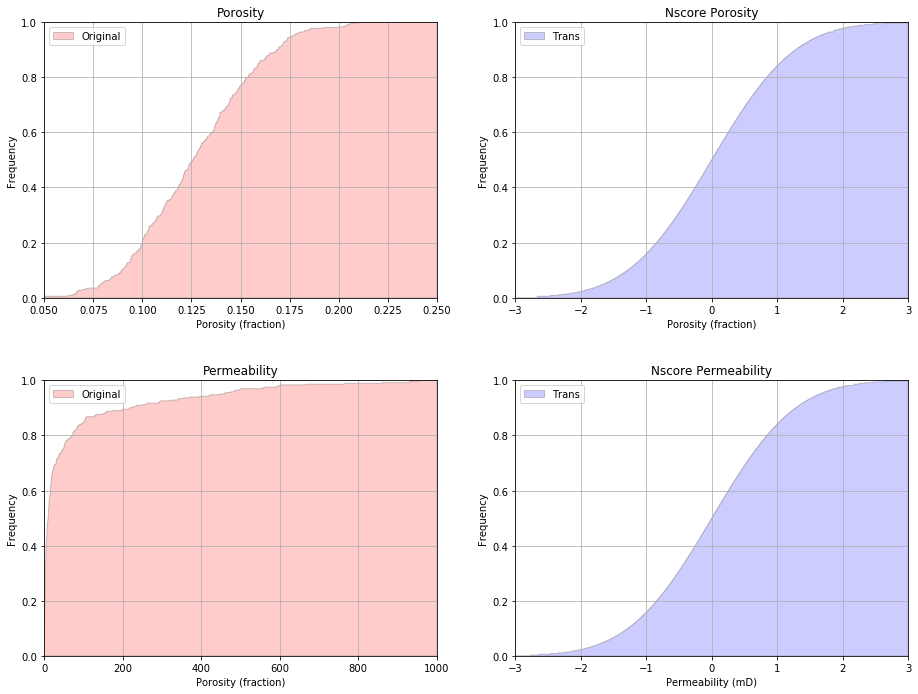

In [8]:
plt.subplot(221)                                        # plot original sand and shale porosity histograms
plt.hist(df['Porosity'], facecolor='red',bins=np.linspace(0.0,0.25,1000),histtype="stepfilled",alpha=0.2,density=True,cumulative=True,edgecolor='black',label='Original')
plt.xlim([0.05,0.25]); plt.ylim([0,1.0])
plt.xlabel('Porosity (fraction)'); plt.ylabel('Frequency'); plt.title('Porosity')
plt.legend(loc='upper left')
plt.grid(True)

plt.subplot(222)  
plt.hist(df['NPor'], facecolor='blue',bins=np.linspace(-3.0,3.0,1000),histtype="stepfilled",alpha=0.2,density=True,cumulative=True,edgecolor='black',label = 'Trans')
plt.xlim([-3.0,3.0]); plt.ylim([0,1.0])
plt.xlabel('Porosity (fraction)'); plt.ylabel('Frequency'); plt.title('Nscore Porosity')
plt.legend(loc='upper left')
plt.grid(True)

plt.subplot(223)                                        # plot nscore transformed sand and shale histograms
plt.hist(df['Perm'], facecolor='red',bins=np.linspace(0.0,1000.0,100000),histtype="stepfilled",alpha=0.2,density=True,cumulative=True,edgecolor='black',label='Original')
plt.xlim([0.0,1000.0]); plt.ylim([0,1.0])
plt.xlabel('Porosity (fraction)'); plt.ylabel('Frequency'); plt.title('Permeability')
plt.legend(loc='upper left')
plt.grid(True)

plt.subplot(224)                                        # plot nscore transformed sand and shale histograms
plt.hist(df['NPerm'], facecolor='blue',bins=np.linspace(-3.0,3.0,100000),histtype="stepfilled",alpha=0.2,density=True,cumulative=True,edgecolor='black',label = 'Trans')
plt.xlim([-3.0,3.0]); plt.ylim([0,1.0])
plt.xlabel('Permeability (mD)'); plt.ylabel('Frequency'); plt.title('Nscore Permeability')
plt.legend(loc='upper left')
plt.grid(True)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=2.2, wspace=0.2, hspace=0.3)
plt.show()

The normal score transform has correctly transformed the porosity and permeability to standard normal.

#### Method \#1:Ocular Inspection of Posted Data

Data visualization is very useful to detect patterns. Our brains are very good at pattern detection. I promote quantitative methods and recognize issues with cognitive bias, but it is important to recognize the value is expert intepretation based on data visualization.

* This data visualization will also be important to assist with parameter selection for the quantitative methods later.

Let's plot the location maps of normal score transforms of porosity and permeability for all facies. We will also include a cross plot of the nscore permeability vs. porosity colored by facies to aid with comparison in spatial features between the porosity and permeability data.

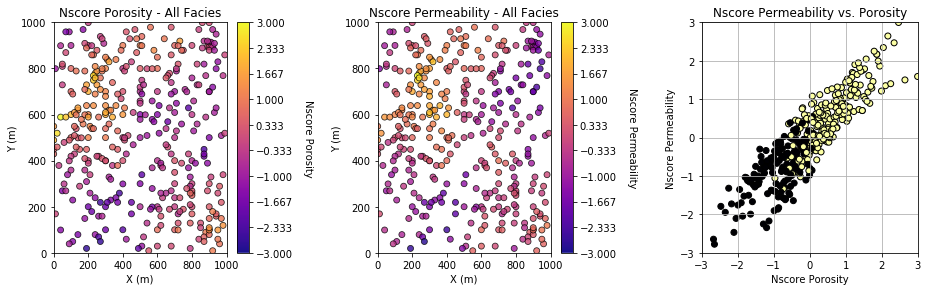

In [9]:
cmap = plt.cm.plasma                    # color map
plt.subplot(131)
GSLIB.locmap_st(df,'X','Y','NPor',0,1000,0,1000,-3,3,'Nscore Porosity - All Facies','X (m)','Y (m)','Nscore Porosity',cmap)

plt.subplot(132)
GSLIB.locmap_st(df,'X','Y','NPerm',0,1000,0,1000,-3,3,'Nscore Permeability - All Facies','X (m)','Y (m)','Nscore Permeability',cmap)

plt.subplot(133)
facies = df['Facies'].values +0.01
plt.scatter(df['NPor'],df['NPerm'],c = facies,edgecolor = 'black',cmap = plt.cm.inferno)
#plt.plot([-3,3],[-3,3],color = 'black')
plt.xlabel(r'Nscore Porosity')
plt.ylabel(r'Nscore Permeability')
plt.title('Nscore Permeability vs. Porosity')
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.grid(True)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=0.8, wspace=0.5, hspace=0.3)
plt.show()

Let's add the variogram map for irreuglar data.  I will add this to GeostatsPy soon.

What do you see?  Here's my observations:

* there is a high degree of spatial agreement between porosity and permeability, this is supported by the high correlation evident in the cross plot.
* there are no discontinuities that could suggest that facies represent a distinct change, rather the porosity and permeability seem continuous and the assigned facies are a truncation of their continous behavoir, we doing 'ok' with no facies
* suspect a 045 azimuth major direction of continuity (up - right)
* there may be cycles in the 135 azimuth 
* there will not likely be a nugget effect, but there is an hint of some short scale discontinuity?


#### Quantitative Methods

Let's try out variogram maps. 

* I realized that I had not coded variogram maps in Python, so I just did it and added it to GeostatsPy.

In [10]:
# GSLIB's VARMAP program (Deutsch and Journel, 1998) converted from the original Fortran to Python 
# by Michael Pyrcz, the University of Texas at Austin (Jan, 2019)
# Note simplified for 2D, irrelgular data only

def varmapv(df,xcol,ycol,vcol,tmin,tmax,nxlag,nylag,dxlag,dylag,minnp,isill): 

# Parameters - consistent with original GSLIB    
# df - DataFrame with the spatial data, xcol, ycol, vcol coordinates and property columns
# tmin, tmax - property trimming limits
# xlag, xltol - lag distance and lag distance tolerance
# nlag - number of lags to calculate
# azm, atol - azimuth and azimuth tolerance
# bandwh - horizontal bandwidth / maximum distance offset orthogonal to azimuth
# isill - 1 for standardize sill

# Load the data

    df_extract = df.loc[(df[vcol] >= tmin) & (df[vcol] <= tmax)]    # trim values outside tmin and tmax
    nd = len(df_extract)
    x = df_extract[xcol].values
    y = df_extract[ycol].values
    vr = df_extract[vcol].values
    
# Summary statistics for the data after trimming
    avg = vr.mean()
    stdev = vr.std()
    sills = stdev**2.0
    ssq = sills
    vrmin = vr.min()
    vrmax = vr.max()   
    
# Initialize the summation arrays
    npp = np.zeros((nylag*2+1,nxlag*2+1))
    gam = np.zeros((nylag*2+1,nxlag*2+1))
    nppf = np.zeros((nylag*2+1,nxlag*2+1))
    gamf = np.zeros((nylag*2+1,nxlag*2+1))
    hm = np.zeros((nylag*2+1,nxlag*2+1))
    tm = np.zeros((nylag*2+1,nxlag*2+1))
    hv = np.zeros((nylag*2+1,nxlag*2+1))
    tv = np.zeros((nylag*2+1,nxlag*2+1))

# First fix the location of a seed point: 
    for i in range(0,nd):     
# Second loop over the data: 
        for j in range(0,nd): 
# The lag:
            ydis = y[j] - y[i]
            iyl = nylag + int(ydis/dylag)
            if iyl < 0 or iyl > nylag*2: # acocunting for 0,...,n-1 array indexing
                continue
            xdis = x[j] - x[i]
            ixl = nxlag + int(xdis/dxlag)
            if ixl < 0 or ixl > nxlag*2: # acocunting for 0,...,n-1 array indexing
                continue
                
# We have an acceptable pair, therefore accumulate all the statistics
# that are required for the variogram:
            npp[iyl,ixl] = npp[iyl,ixl] + 1 # our ndarrays read from the base to top, so we flip
            tm[iyl,ixl] = tm[iyl,ixl] + vr[i]
            hm[iyl,ixl] = hm[iyl,ixl] + vr[j]
            tv[iyl,ixl] = tm[iyl,ixl] + vr[i]*vr[i]
            hv[iyl,ixl] = hm[iyl,ixl] + vr[j]*vr[j]
            gam[iyl,ixl] = gam[iyl,ixl] + ((vr[i]-vr[j])*(vr[i]-vr[j]))

# Get average values for gam, hm, tm, hv, and tv, then compute
# the correct "variogram" measure:
    for iy in range(0,nylag*2+1): 
        for ix in range(0,nxlag*2+1): 
            if npp[iy,ix] <= minnp:
                gam[iy,ix] = -999.
                hm[iy,ix]  = -999.
                tm[iy,ix]  = -999.
                hv[iy,ix]  = -999.
                tv[iy,ix]  = -999.
            else:
                rnum = npp[iy,ix]
                gam[iy,ix] = gam[iy,ix] / (2*rnum) # semivariogram
                hm[iy,ix] = hm[iy,ix] / rnum
                tm[iy,ix] = tm[iy,ix] / rnum
                hv[iy,ix] = hv[iy,ix] / rnum - hm[iy,ix]*hm[iy,ix]
                tv[iy,ix] = tv[iy,ix] / rnum - tm[iy,ix]*tm[iy,ix]
                
# Attempt to standardize:
            if isill > 0:
                gamf[iy,ix] = gamf[iy,ix]/sills

    for iy in range(0,nylag*2+1): 
        for ix in range(0,nxlag*2+1):             
            gamf[iy,ix] = gam[nylag*2-iy,ix]
            nppf[iy,ix] = npp[nylag*2-iy,ix]
            
    return gamf, nppf    


The inputs include: 

* input data - DataFrame, 'df', and columns for x, y and property of interest, 'x', 'y' and 'vcol', 
* variogram map parameters - number of cells in each direction to search, 'nxlag', nylag', the cell size / lag distance, 'dxlag' and 'dylag'''
* search - the minimum number of pairs reuqired to assign a result, 'mnpairs'
* normalization - 1 for standardize variance to 1.0 and 0 for not

The output is a 2D ndarray with the variogram map and the number of pairs.

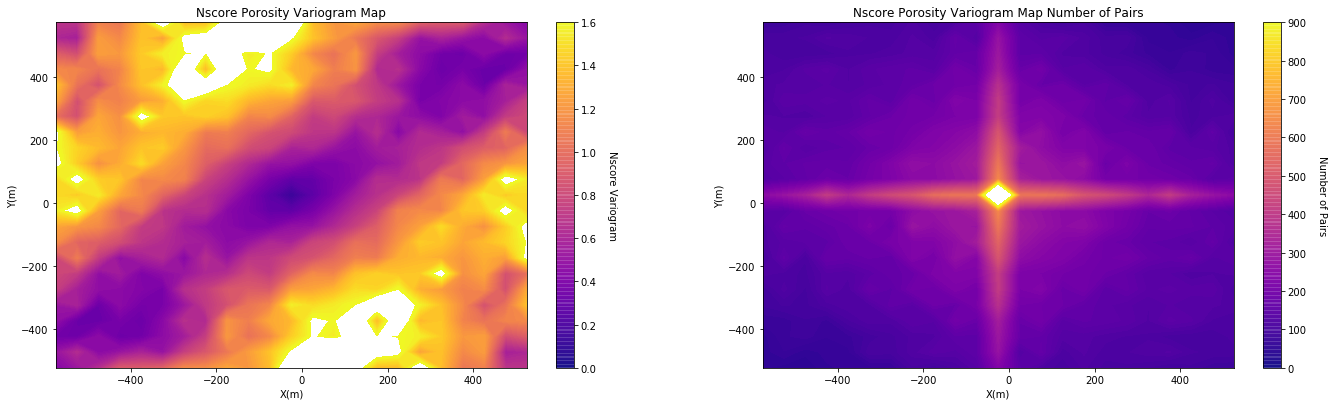

The shape of the output is (23, 23)


In [11]:
vmap, npmap = varmapv(df,'X','Y','NPor',tmin=-999,tmax=999,nxlag=11,nylag=11,dxlag=50,dylag=50,minnp=1,isill=1)

plt.subplot(121)
GSLIB.pixelplt_st(vmap,-575,575,-575,575,50.0,0,1.6,'Nscore Porosity Variogram Map','X(m)','Y(m)','Nscore Variogram',cmap)

plt.subplot(122)
GSLIB.pixelplt_st(npmap,-575,575,-575,575,50.0,0,900,'Nscore Porosity Variogram Map Number of Pairs','X(m)','Y(m)','Number of Pairs',cmap)

plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=1.2, wspace=0.2, hspace=0.2)
plt.show()

print('The shape of the output is ' + str(vmap.shape))

Notice that the output ndarray is 23, 23 cells? We asked for the number of cells to extend in each direction, 11 and 11 in x and y.  The map has an origin (zero distance) cell in the middle and extends 11 in both positive and negative directions.  So we have 2*$nx$ + 1, 2*$ny$ + 1 cells in the resulting variogram map and the $xmin = -1 * (nx * x_{cellsize} + \frac{1}{2} x_{cellsize})$ and the $xmax = nx * x_{cellsize} + \frac{1}{2} x_{cellsize}$

What do you think of this variogram map? These are my observations:

* major continuity direction is at azimuth 045
* there is a high degree of geometric anisotropy
* there is cyclicity in the 135 direction 
* there may be some cyclicity in the 045 direction

From this variogram map we can immediately see directionality in our spatial data.

#### Experimental Variograms

Another method for exploring spatial data directionality is the calculation of multiple experimental variograms for a variety of directions.

We can use the location maps to help determine good variogram calculation parameters.

```p
tmin = -9999.; tmax = 9999.; 
lag_dist = 100.0; lag_tol = 50.0; nlag = 7; bandh = 9999.9; azi = azi; atol = 22.5; isill = 1
```
* tmin, tmax are trimming limits - set to have no impact, no need to filter the data
* lag_dist, lag_tol are the lag distance, lag tolerance - set based on the common data spacing (100m) and tolerance as 100% of lag distance for additonal smoothing
* nlag is number of lags - set to extend just past 50 of the data extent
* bandh is the horizontal band width - set to have no effect
* azi is the azimuth -  it has not effect since we set atol, the azimuth tolerance, to 90.0
* isill is a boolean to standardize the distribution to a variance of 1 - it has no effect since the nscore transform sets the variance to 1.0

In [12]:
tmin = -9999.; tmax = 9999.                             # no trimming 
lag_dist = 100.0; lag_tol = 100.0; nlag = 7;            # maximum lag is 700m and tolerance > 1/2 lag distance for smoothing
bandh = 9999.9; atol = 22.5                             # no bandwidth, directional variograms
isill = 1                                               # standardize sill
azi_mat = [0,22.5,45,67.5,90,112.5,135,157.5]           # directions in azimuth to consider

Let's try running these variograms and visualizing them on separate plots.  I'll demonstrate a method to promgramtically loop over each direction for efficiency (and code brevity).

* we have the direction in the list called 'azi_mat'
* we use the command:
```p
for iazi in range(0,len(azi_mat)): 
```
to loop over all the elements in the list with index 'iazi'

* we run the variogram calculation and store the reuslts in 2D arrays, iy is direction, ix is the lag
* we use subplots with the 'iazi' index to add each plot

```p
    plt.subplot(4,2,iazi+1)
```
we add one because the plot index must be $1,\ldots,n$, but arrays / list index as $0,\ldots,n-1$ in Python.

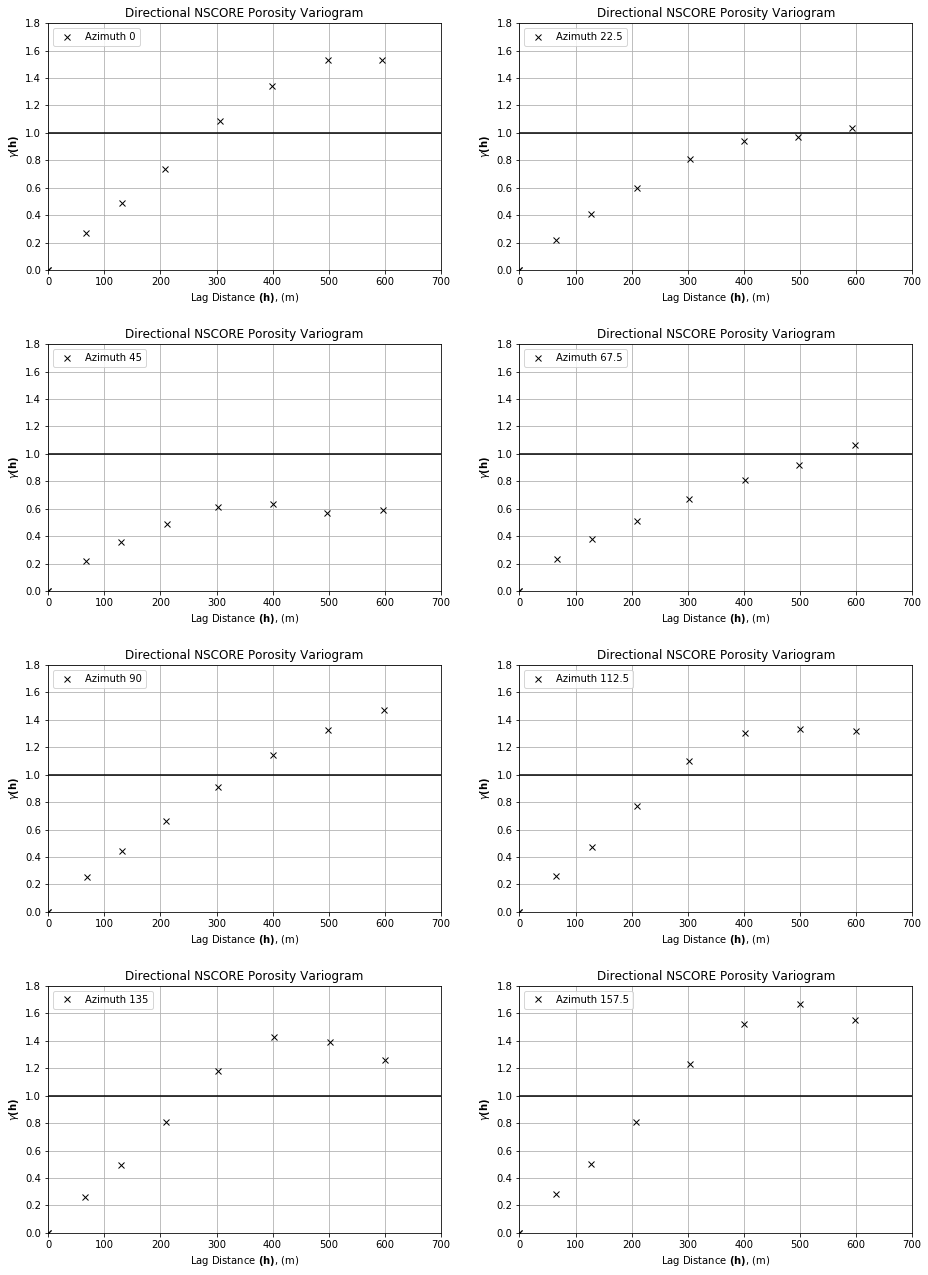

In [13]:
# Arrays to store the results
lag = np.zeros((len(azi_mat),nlag+2)); gamma = np.zeros((len(azi_mat),nlag+2)); npp = np.zeros((len(azi_mat),nlag+2));

for iazi in range(0,len(azi_mat)):                      # Loop over all directions
    lag[iazi,:], gamma[iazi,:], npp[iazi,:] = geostats.gamv(df,"X","Y","NPor",tmin,tmax,lag_dist,lag_tol,nlag,azi_mat[iazi],atol,bandh,isill)
    plt.subplot(4,2,iazi+1)
    plt.plot(lag[iazi,:],gamma[iazi,:],'x',color = 'black',label = 'Azimuth ' +str(azi_mat[iazi]))
    plt.plot([0,2000],[1.0,1.0],color = 'black')
    plt.xlabel(r'Lag Distance $\bf(h)$, (m)')
    plt.ylabel(r'$\gamma \bf(h)$')
    plt.title('Directional NSCORE Porosity Variogram')
    plt.xlim([0,700])
    plt.ylim([0,1.8])
    plt.legend(loc='upper left')
    plt.grid(True)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=4.2, wspace=0.2, hspace=0.3)
plt.show()

The directional variograms provide a very clear image of directionality. The ranges vary from 300m, 500m to zonal anisotropy, to 500m, 350m, 280m, 250m and finally 280m.  We are observing the actually spatial continuity ellipse by exploring a variety of directions! 

* We can observe that Azimuth 045 is the major direction and Azimuth 135 is the minor direction.

This is a very powerful tool for exploring directionality in spatial datasets.

<i>&copy; Copyright daytum 2021. All Rights Reserved</i>